# Cleaning Kaggle Dataset to model Global Sales

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')


Data from https://www.kaggle.com/ashaheedq/video-games-sales-2019#vgsales-12-4-2019-short.csv

In [41]:
vgdata = pd.read_csv('vgsales-12-4-2019.csv')
vgdata.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [42]:
drop = ['img_url','url','status','Last_Update','Other_Sales','basename','VGChartz_Score','Vgchartzscore']
vgdata.drop(columns = drop,axis = 1,inplace = True)

In [43]:
vgdata.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,2009.0


# Clean and engineer

Multiplatform may have some power in the total sales

In [44]:
vgdata.shape

(55792, 15)

In [45]:
right = vgdata.groupby('Name')['Platform'].count()
vgdata = vgdata.merge(right,on='Name',how='left', suffixes = ('','_count'))

In [46]:
conditions = [vgdata['Platform_count'] > 1]
result = [1]
vgdata['Multiplatform'] = np.select(conditions,result,0)

In [47]:
#checking this works since the process doesn't work for publisher/developers columns
vgdata[vgdata['Platform_count'] > 1][['Name','Platform']][:10]

,Name,Platform
1,Super Mario Bros.,NES
3,PlayerUnknown's Battlegrounds,PC
7,Tetris,GB
9,Minecraft,PC
14,Mario Kart DS,DS
18,Super Mario World,SNES
19,Grand Theft Auto V,PS3
20,Grand Theft Auto V,PS4
23,Super Mario Land,GB
26,Grand Theft Auto: San Andreas,PS2


In [48]:
vgdata['Age'] = 2019 - vgdata['Year']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a238daf90>]],
      dtype=object)

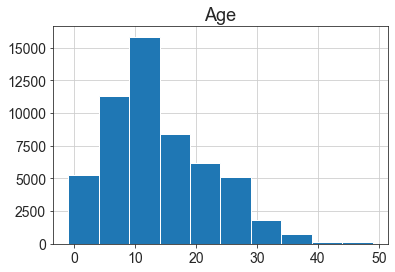

In [49]:
vgdata.hist('Age') #actually very insightful to see that the data set actually has a negative number.
#this means there's 2020 release year data obtain in 2019. This wouldn't be super important because it most likely
#won't have the global sales.

Text(29.0, 0.5, 'Index Location')

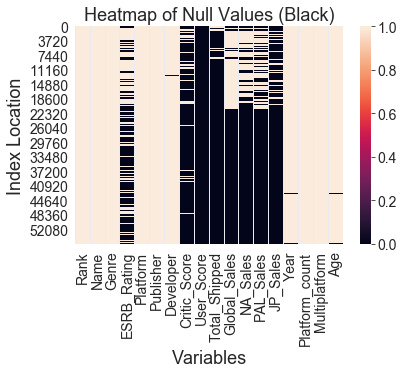

In [59]:
sns.heatmap(vgdata.notnull()) #Alot of NA entries and need to be subsetted before analysis
plt.title('Heatmap of Null Values (Black)')
plt.xlabel('Variables')
plt.ylabel('Index Location')

# More Subseting and Cleaning

In [12]:
vgdata = vgdata[(vgdata['Global_Sales'].notnull() & vgdata['Global_Sales'] != 0) & vgdata['Age'] < 35] # & vgdata['NA_Sales'].notnull() & vgdata['JP_Sales'].notnull() & vgdata['PAL_Sales'].notnull()]
vgdata['Name'].value_counts() #1905 different games with all the data in

vgdata.shape #2438 rows with data in potential variables of interest
vgdata.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year,Platform_count,Multiplatform,Age
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,2006.0,1,0,13.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,1985.0,4,1,34.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,2008.0,1,0,11.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,3,1,2.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,2009.0,1,0,10.0


In [13]:
vgdata = vgdata[vgdata['Age'] < 35]

In [14]:
def inflation_adjuster(age,sales):
    if age > 0:
        rates = [0,0.018,0.041,0.061,0.074,0.089,0.102,0.12,0.147,0.161,0.158,0.211,0.236,0.261,0.28,0.296,0.308,0.326,0.348,0.372,0.386,0.404,0.42,0.435,0.451,0.467,0.489,0.515,0.537,0.556,0.571,0.579,0.594,0.61,0.623]
        infl_dict = {}
        for ind,rate in enumerate(rates):
            infl_dict[ind] = rate

        multiplier = 1.00 - infl_dict[age]
        return sales*multiplier
    else:
        return sales

In [15]:
#column 10,  -1
vgdata['Global_Sales_Adj'] = vgdata.apply(lambda x: inflation_adjuster(x.Age, x.Global_Sales), axis=1)

In [16]:
vgdata = vgdata[vgdata['Critic_Score'].notnull() & vgdata['Global_Sales_Adj'].notnull()]

In [17]:
vgdata = vgdata[(vgdata['Platform'] == 'PC') & (vgdata['Global_Sales_Adj'] > 0.001)]

Popular publishers may have an impact as well

In [18]:
publishers_counts = vgdata.groupby('Publisher')['Publisher'].count().sort_values(ascending = False)
y = list(publishers_counts.index[:10]) #list of publishers
x = list(publishers_counts.values[:10])7

Text(0.5, 1.0, 'Common Game Publishers')

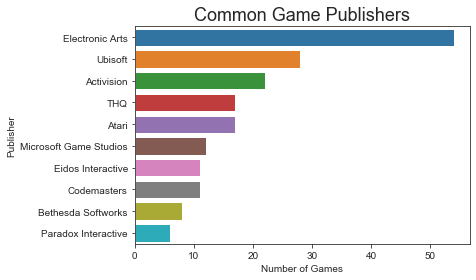

In [19]:
sns.barplot(x,y)

#axis labels
plt.xlabel('Number of Games')
plt.ylabel('Publisher')

#fonts
# plt.rc('font', size = 14)
plt.rc('axes', titlesize=18, )     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.title('Common Game Publishers')

In [20]:
#Engineering new column on publisher popularity by transforming group by to dictionary to list to dataframe
#no list comprehension because already very long
pub_list = []
for key,value in zip(list(vgdata.groupby('Publisher')['Publisher'].count().index),list(vgdata.groupby('Publisher')['Publisher'].count().values)):
    pub_list.append([key,value])
    
publisher_df = pd.DataFrame(pub_list,columns = ['Publisher','Publisher_count'])

#merging new column in

vgdata = vgdata.merge(publisher_df,on='Publisher',how='left')

In [21]:
#create a feature called frequent publisher so publishers with 

conditions = [
    vgdata['Publisher_count'] > 15,  #popular
    vgdata['Publisher_count'] > 5,  #medium popular
]

result = [2,1]
vgdata['Frequent_Publisher'] = np.select(conditions,result,0)

In [22]:
#drop
drop_columns = ['Rank','Developer','User_Score','Total_Shipped','NA_Sales','PAL_Sales','JP_Sales','Publisher_count']
vgdata.drop(drop_columns,axis = 1, inplace = True)

In [23]:
vgdata.head()

,Name,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,Year,Platform_count,Multiplatform,Age,Global_Sales_Adj,Frequent_Publisher
0,The Sims 3,Simulation,T,PC,Electronic Arts,8.5,7.96,2009.0,9,1,10.0,6.70232,2
1,Microsoft Flight Simulator,Simulation,E,PC,Microsoft,7.0,5.12,1996.0,1,0,23.0,2.89280,0
2,Half-Life,Shooter,M,PC,Sierra Entertainment,9.5,4.12,1998.0,3,1,21.0,2.45552,1
3,The Sims 4,Simulation,T,PC,Electronic Arts,7.0,4.10,2014.0,4,1,5.0,3.73510,2
4,The Elder Scrolls V: Skyrim,Role-Playing,M,PC,Bethesda Softworks,9.2,3.99,2011.0,4,1,8.0,3.40347,1


In [26]:
vgdata.shape

(303, 13)

In [27]:
vgdata.to_csv('pc_sale_data.csv')

---